In [275]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [276]:
#Loading Dataset
Zoo=pd.read_csv("/content/Zoo.csv")
Zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [277]:
Zoo.shape

(101, 18)

In [278]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [279]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [280]:
Zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [281]:
Zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

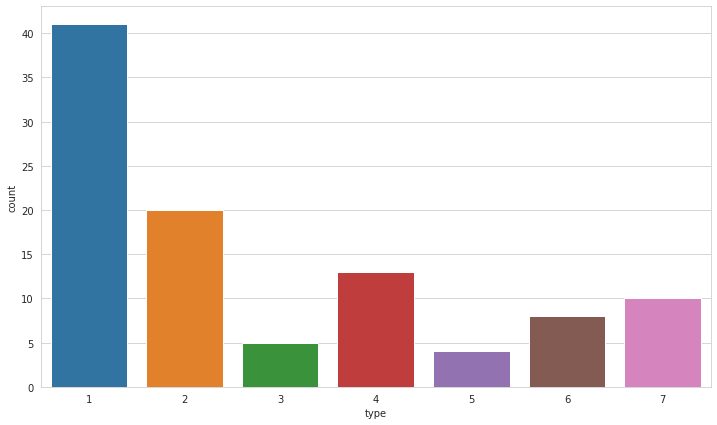

In [282]:
sns.countplot(x = 'type', data = Zoo)

**With the help of this count Plot(bar plot) we can see there are 7 classes(categories).**

**1) Most of the data points lie in  1(first) category.**

**2) Very less no. of data points belonged to the 5 category followed by 3rd category.**


[]

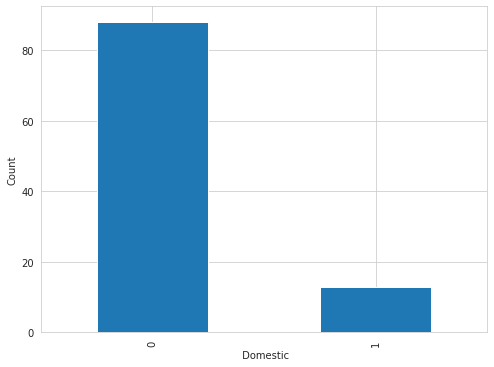

In [283]:
plt.figure(figsize=(8,6))
Zoo.domestic.value_counts().plot(kind="bar")
plt.xlabel(' Domestic')
plt.ylabel("Count")
plt.plot()

**This bar plot shows the count of domestic animals & we can see that count of domestic animal is very less** **as compared to the count of non-domestic ones**

In [284]:
pd.crosstab(Zoo.type, Zoo.domestic)

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


[]

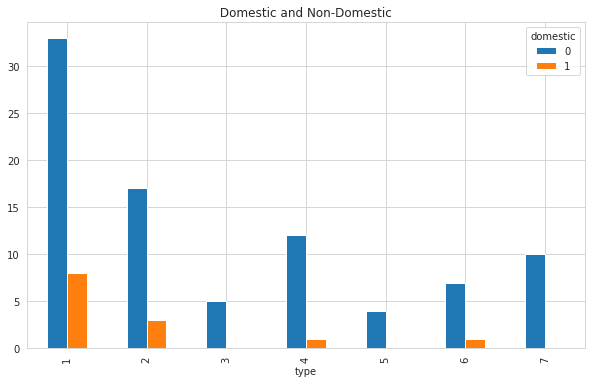

In [285]:
pd.crosstab(Zoo.type, Zoo.domestic).plot(kind="bar", figsize=(10, 6), title=" Domestic and Non-Domestic ")
plt.plot()

**Here we are putting domestic against types.**

**We can see that out of 101 datapoints only 13 data points lies in domestic.**

**In percent if we see out of 100% only 11% animals are domestic.**


In [286]:
Zoo.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [287]:
pd.crosstab(Zoo.type, Zoo.milk)

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


<AxesSubplot:title={'center':'Milching animals'}, xlabel='type'>

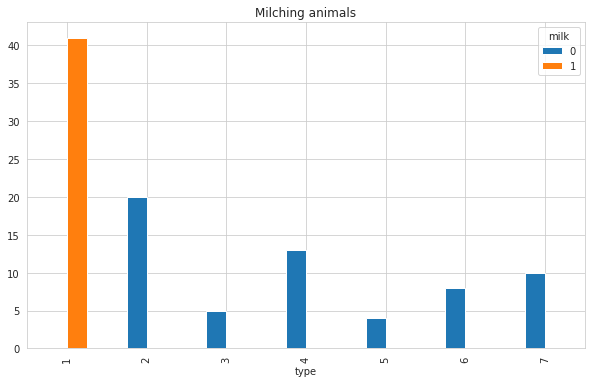

In [288]:
pd.crosstab(Zoo.type, Zoo.milk).plot(kind="bar", title="Milching animals",figsize=(10, 6))

**This visualisation shows that large amount of animals produces milk they could be mammal.**

**In percentage we can say out of 100% , 40% animals are mammals.**

In [289]:
Zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [290]:
pd.crosstab(Zoo.type, Zoo.aquatic)

aquatic,0,1
type,,
1,35,6
2,14,6
3,4,1
4,0,13
5,0,4
6,8,0
7,4,6


<AxesSubplot:xlabel='type'>

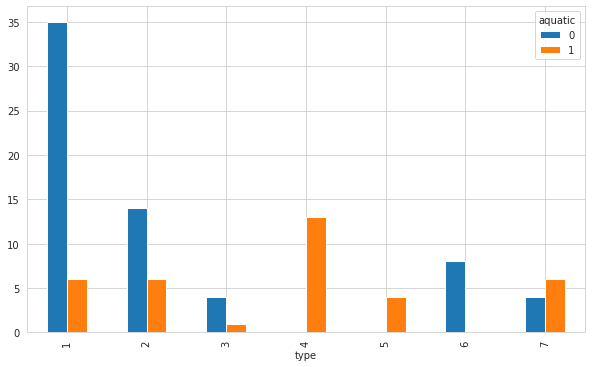

In [291]:
pd.crosstab(Zoo.type, Zoo.aquatic).plot(kind="bar", figsize=(10, 6))

**Aquatic animals lies in all the categories except category no.6**

**In category no.4 count of aquatic animals is much more as compared to other categories**

**Vice versa in category no.3 aquatic animal count is very less.**

Text(0.5, 1.0, 'Classification of Animals')

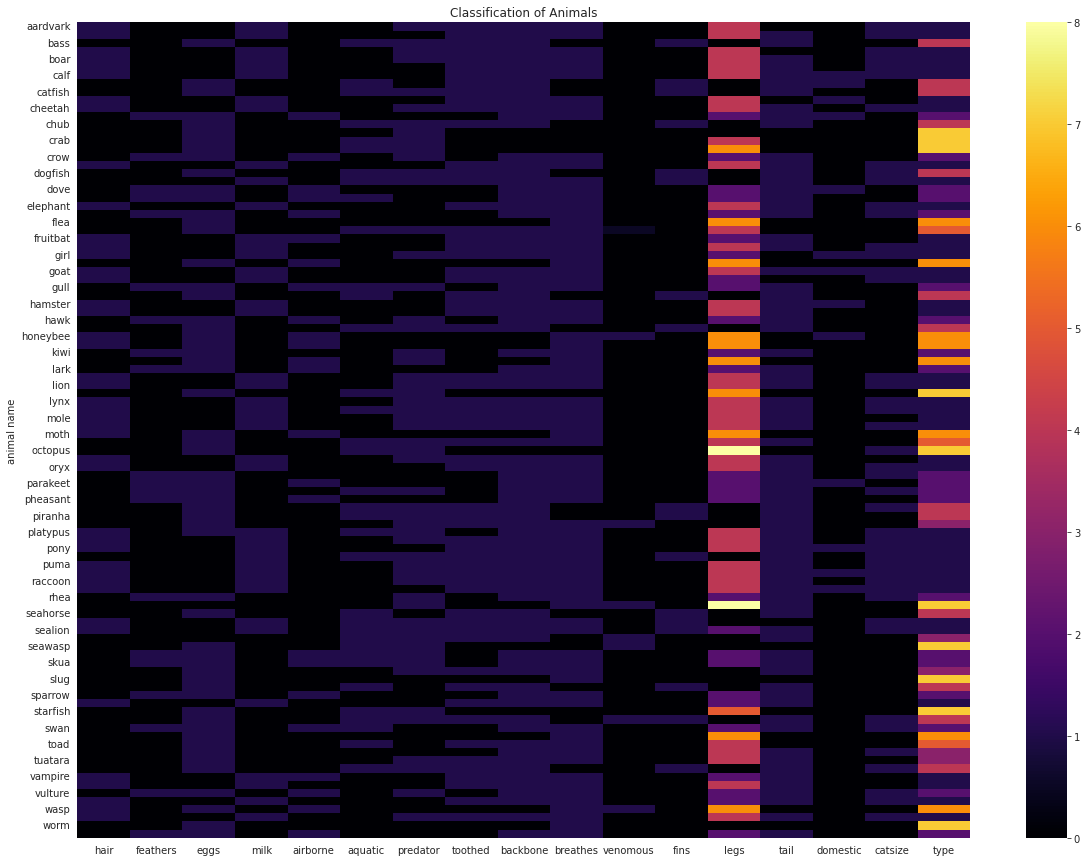

In [292]:
#Putting column names against animal names using heat map
Zoo_temp = Zoo
Zoo_temp = Zoo_temp.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (20,15) 
sns.heatmap(Zoo_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Classification of Animals")

**This heatmap is used to show the trends or corelation between the data.**

**From this we can see that all of the animal characteristics or feature values are given as binary values,except for the legs & type where it is given as a count of legs and categories as (1-7).**

Text(0.5, 1.0, 'HeatMap for Classes')

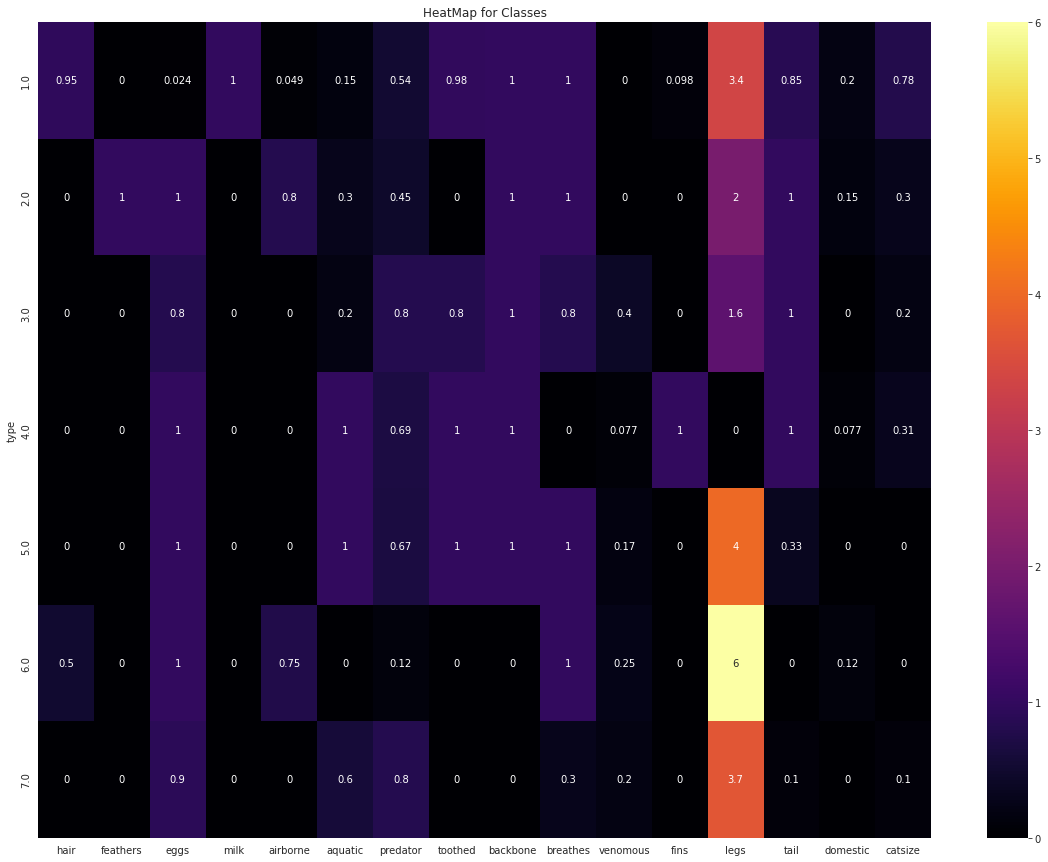

In [293]:
#Putting column names against types using heat map
Zoo_temp = Zoo_temp.groupby(by='type').mean()
plt.rcParams['figure.figsize'] = (20,15) 
sns.heatmap(Zoo_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap for Classes")

**This heatmap shows correlation between the characetristic or features on animals with their specific categories which they belong to**

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

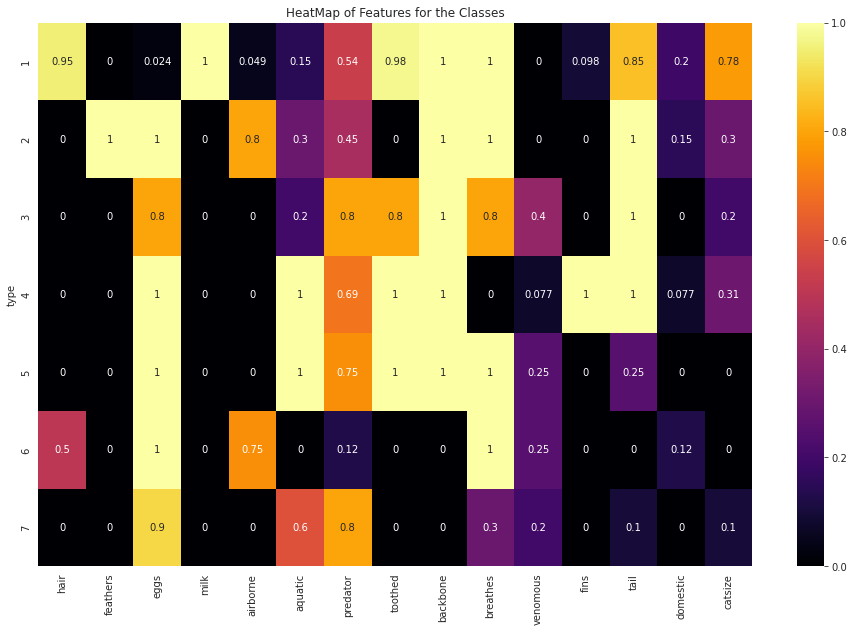

In [294]:
Zoo_temp1 = Zoo.drop(['legs'], axis=1)
Zoo_temp1 = Zoo_temp1.groupby(by='type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(Zoo_temp1, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

**This visualization tells us much information about what features play a more or less important role in identifying specific animals.**

In [295]:
Zoo_df = Zoo.rename(columns= {'animal name':'animal_name'}, inplace = True)


In [296]:
Zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [297]:
Zoo1 = Zoo.drop('animal_name', axis = 1)
Zoo1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [298]:
X = Zoo1.drop('type', axis = 1)
y = Zoo['type']

In [299]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [300]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [302]:
X_train.shape

(75, 16)

In [303]:
y_train.shape

(75,)

In [304]:
X_test.shape

(26, 16)

In [305]:
y_test.shape

(26,)

**Training Model Using KNN Classifier on Zoo Dataset**

In [306]:
#Fitting k-nearest neighbors classifier with training sets for n = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Evaluating the model by running predictions on test data**

In [307]:
y_pred = knn.predict(X_test)

In [308]:
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 4,
       1, 2, 1, 1])

In [309]:
pred_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
pred_data

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


**As we can see our prediction values are almost correct as if we compared it with the actual ones**

**Using Confusion matrix & displaying classification reports**

In [310]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [311]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


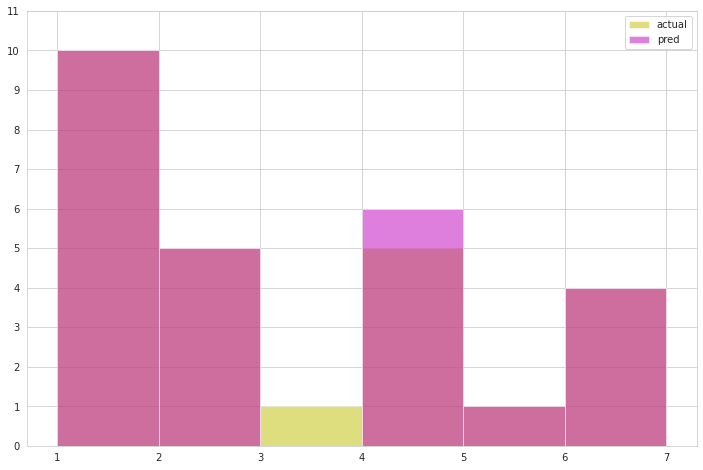

In [312]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'y', alpha = 0.5, label = 'actual', bins=6)
ax.hist(y_pred, color = 'm', alpha = 0.5, label = 'pred', bins=6)
ax.yaxis.set_ticks(np.arange(0,12))
ax.legend(loc = 'best')
plt.show()

**This visualization tells us category wise total number of animals according to the test and predicted data.**

**here color overlapping indicates that the predictions are almost matching our actual values.**

**For Category 3, Model failed to identify animal class as it belonging to category 3 and marked it into being in Category 4.**


In [313]:
#Getting scores for different values of n
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

In [314]:
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=3)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [315]:
mean_scores

[0.9199999999999999,
 0.88,
 0.8133333333333334,
 0.7733333333333334,
 0.7600000000000001,
 0.7466666666666667,
 0.7200000000000001,
 0.64,
 0.5866666666666668,
 0.5733333333333334,
 0.5733333333333334,
 0.5733333333333334,
 0.56,
 0.5333333333333333,
 0.52,
 0.48,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334]

In [316]:
error_rate

[0.0,
 0.0,
 0.038461538461538464,
 0.07692307692307693,
 0.11538461538461539,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.23076923076923078,
 0.4230769230769231,
 0.4230769230769231,
 0.4230769230769231,
 0.4230769230769231,
 0.4230769230769231,
 0.4230769230769231,
 0.4230769230769231,
 0.4230769230769231,
 0.46153846153846156,
 0.46153846153846156,
 0.5,
 0.5,
 0.6153846153846154]

**Visualizing Performance of the Model by passing different values of K**

**This will ultimately help us to know which value of K works best with this model**

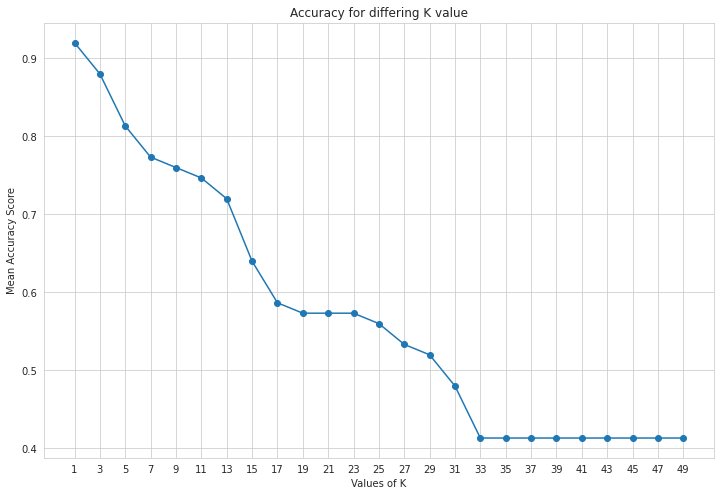

In [317]:
plt.plot(k_list,mean_scores, marker='o')
plt.title('Accuracy for differing K value')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (15,7) 
plt.show()

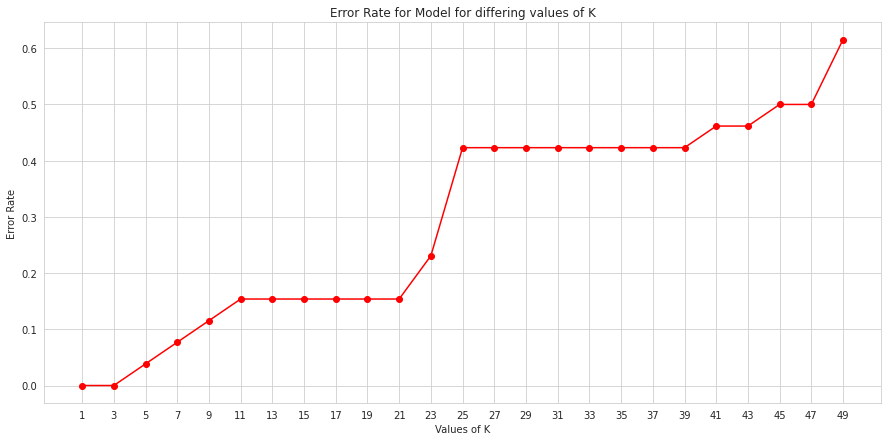

In [318]:
plt.plot(k_list,error_rate, color='r', marker = 'o')
plt.title('Error Rate for Model for differing values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (15,7) 
plt.show()

**By using all the given characteristics we got this as a result.**

**What if we consider some of the characteristics differently, In the below code we will take (leg) this chracteristic of animals in binary data instead of taking it as a continuos no.** 


In [319]:
Zoo['has_legs'] = np.where(Zoo['legs']>0,1,0)
Zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,has_legs
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


In [320]:
Zoo2 = Zoo[['animal_name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize','type']]

In [321]:
Zoo2.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1


In [322]:
data = list(Zoo2.columns.values)
data.remove('legs')
data.remove('type')
data.remove('animal_name')
X1 = Zoo2[data]
y1 = Zoo2['type']

In [323]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state = 0)

In [324]:
X1_train.shape

(75, 16)

In [325]:
y1_train.shape

(75,)

In [326]:
X1_test.shape

(26, 16)

In [327]:
y1_test.shape

(26,)

In [328]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(X1_train, y1_train)

KNeighborsClassifier()

In [329]:
#predicting values by using test data
y1_pred = knn1.predict(X1_test)

In [330]:
#confusion matrix for test data & predicted data
print(confusion_matrix(y1_test,y1_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


In [331]:
#Generating classification report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



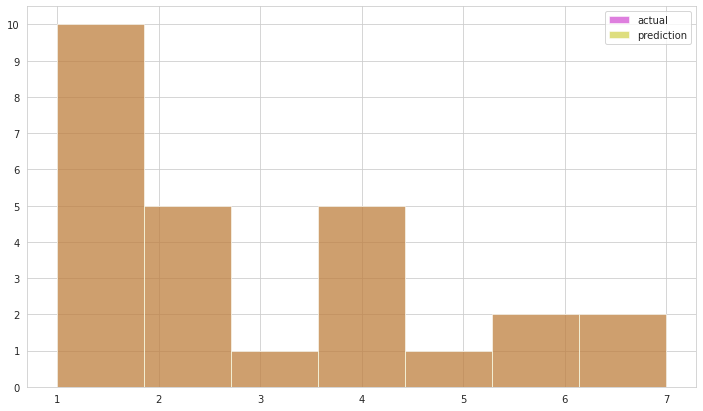

In [332]:
plt.rcParams['figure.figsize'] = (12,7) 
_, ax = plt.subplots()
ax.hist(y1_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y1_pred, color = 'y', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

**This visualization tells us category wise total number of animals according to the test and predicted data.**

**here if we observe there is no color overlapping**

**Which indicates that predicted values are exactly matching the actual ones.**


In [333]:
#Getting scores for different values of n
k_list1 = np.arange(1, 50, 2)
mean_scores1 = []
accuracy_list1 = []
error_rate1 = []

In [334]:
for i in k_list1:
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X1_train,y1_train)
    pred_i = knn1.predict(X1_test)
    score = cross_val_score(knn1,X1_train, y1_train,cv=3)
    mean_scores1.append(np.mean(score))
    error_rate1.append(np.mean(pred_i != y1_test))

In [335]:
mean_scores1

[0.9333333333333332,
 0.88,
 0.88,
 0.8666666666666667,
 0.8533333333333334,
 0.8533333333333334,
 0.8266666666666667,
 0.8133333333333335,
 0.8000000000000002,
 0.7466666666666667,
 0.6933333333333334,
 0.6533333333333333,
 0.6266666666666666,
 0.6133333333333333,
 0.5733333333333334,
 0.5466666666666667,
 0.5466666666666667,
 0.4533333333333333,
 0.44,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334,
 0.4133333333333334]

In [336]:
error_rate1

[0.0,
 0.038461538461538464,
 0.0,
 0.0,
 0.038461538461538464,
 0.11538461538461539,
 0.11538461538461539,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.15384615384615385,
 0.19230769230769232,
 0.23076923076923078,
 0.3076923076923077,
 0.38461538461538464,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156,
 0.46153846153846156]

**For the above procedure we have repeated same steps as we've done before for the old dataset with all the features.**

**Now here we'll plot the old data(all features) and new curves together so we can see and compare any differences.**

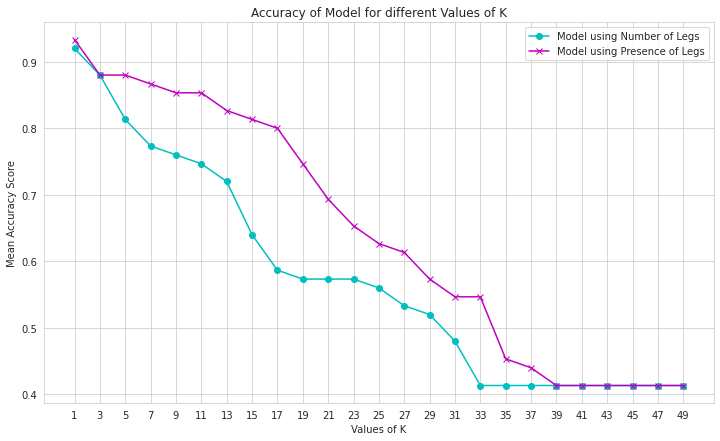

In [337]:
plt.plot(k_list,mean_scores, color='c',marker='o', label='Model using Number of Legs')
plt.plot(k_list1,mean_scores1, color='m',marker='x', label='Model using Presence of Legs')
plt.title('Accuracy of Model for different Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list1)
plt.legend()
plt.rcParams['figure.figsize'] = (15,8) 

plt.show()


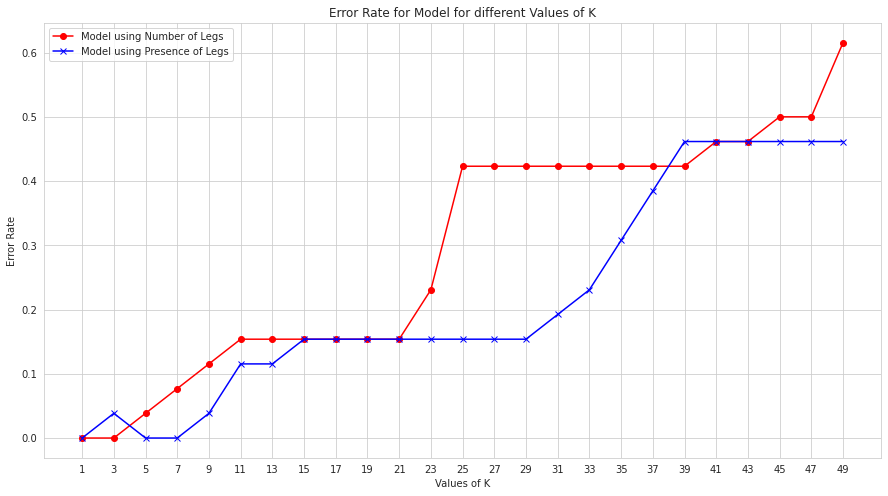

In [339]:
plt.plot(k_list,error_rate, color='r', marker = 'o', label='Model using Number of Legs')
plt.plot(k_list1,error_rate1, color='b', marker = 'x', label='Model using Presence of Legs')
plt.title('Error Rate for Model for different Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list1)
plt.legend()
plt.rcParams['figure.figsize'] = (15,8) 

plt.show()

**Here we can see that the replacement of the feature legs with has_legs have improved the accuracy of KNN models at every value where n >3**
